In [14]:
import pandas as pd 
import numpy as np
import pydotplus

# CLASSIFICATION 
# Two outcome = two class classification model 
# More than two outcome = multi class classification model

# Probablity based statistic 
# Non parametric statistic
# baigean statistic

# attribute and value pairs 
# i.e. age and certian age seperates group into at risk and not at risk
# keep making branches until there is not a significant difference between the groups

# Attribute selection measure is what we use to determine if an attribute 
# is the best attribute to split the data on

# how do decision trees based on information gain work 

# zero assumption about the data when using trees, no need to normalize or scale the data
# downsize is that they are prone to overfitting

# gain ratio = information gain / split info - the split info is the amount of info needed to determine the split
# gini index = 1 - (p^2 + q^2) - p and q are the probabilities of the two classes


In [15]:
# CRISP-DM Process

df= pd.read_csv('/Users/alexandermaat/Downloads/CreditCardData.csv')
print(df.shape)
# grab random subsample of the data 
df = df.sample(n=10000, random_state=1)
print(df.shape)
df.head()


(100000, 16)
(10000, 16)


,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
43660,#3624 414,13-Oct-20,Tuesday,12,MasterCard,CVC,365.0,Online,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,39.0,Barclays,0
87278,#3113 656,14-Oct-20,Wednesday,11,Visa,PIN,371.0,ATM,Food,USA,USA,United Kingdom,F,51.8,RBS,0
14317,#3327 022,14-Oct-20,Wednesday,20,Visa,CVC,123.0,Online,Subscription,United Kingdom,United Kingdom,United Kingdom,M,27.9,Barclays,0
81932,#3036 748,13-Oct-20,Tuesday,13,MasterCard,PIN,15.0,ATM,Food,United Kingdom,United Kingdom,United Kingdom,F,61.9,Barclays,0
95321,#3343 674,14-Oct-20,Wednesday,13,MasterCard,PIN,5.0,ATM,Gaming,United Kingdom,United Kingdom,United Kingdom,M,41.1,Monzo,0


Too many unique values (9952 out of 10000, 1.0) for Transaction ID


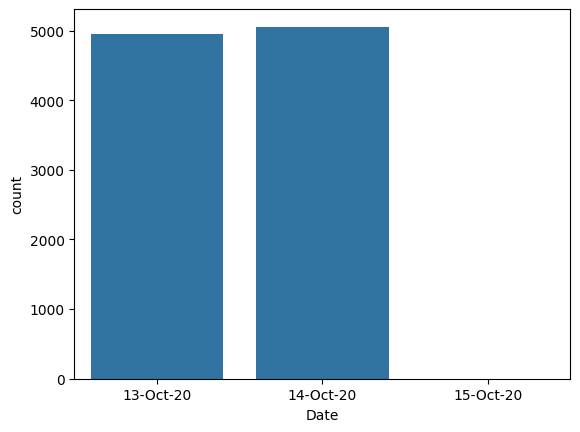

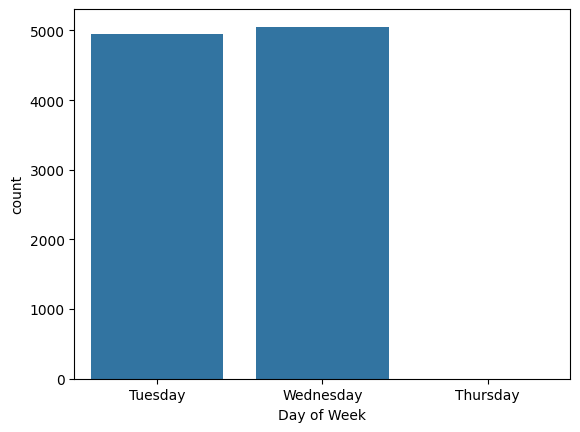

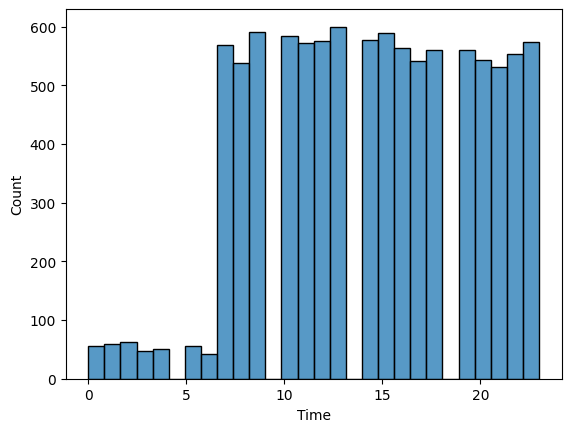

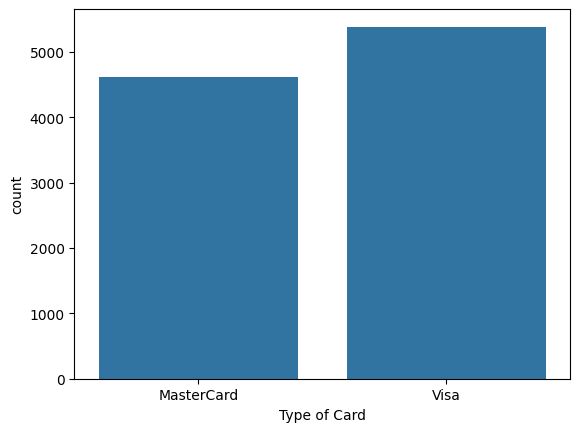

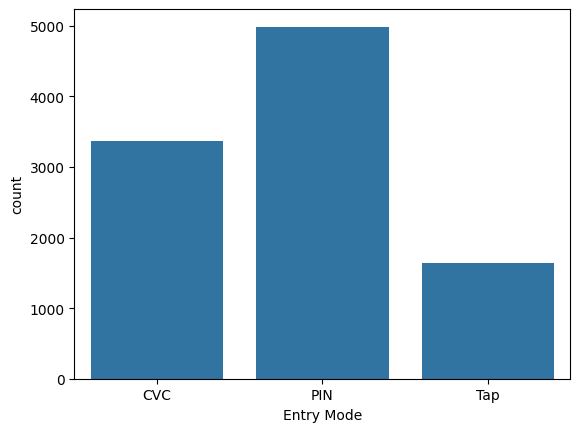

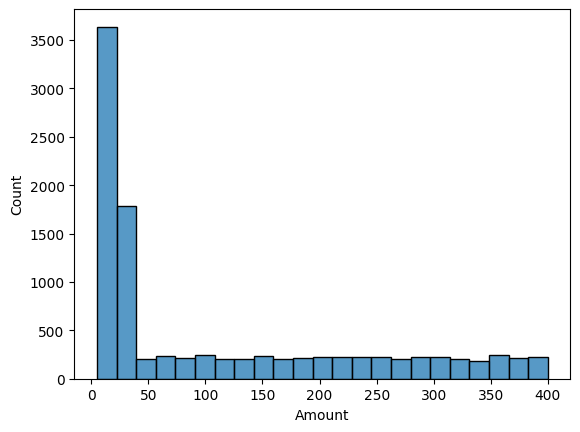

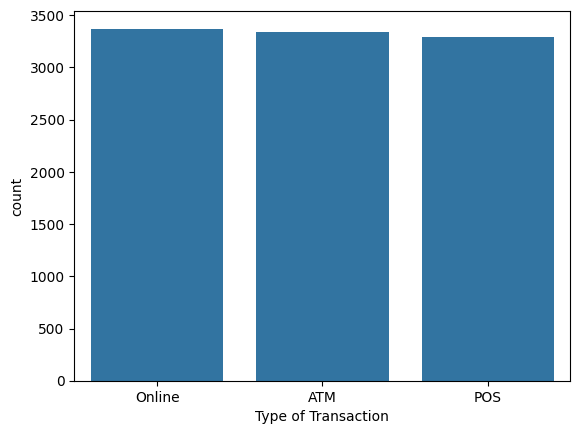

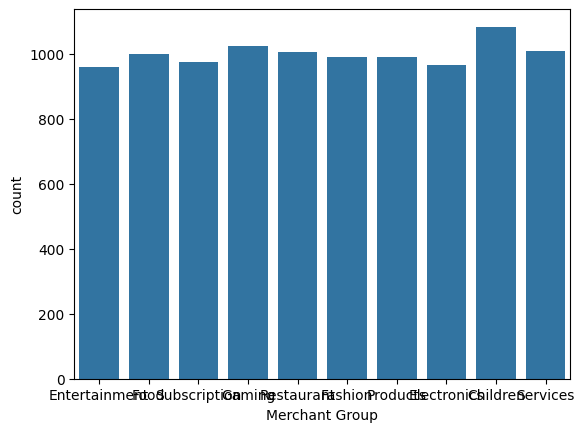

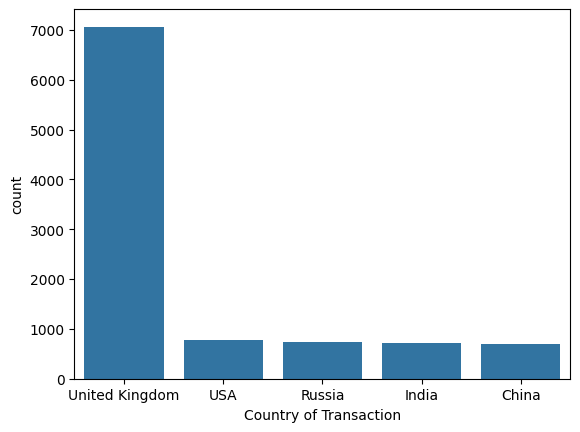

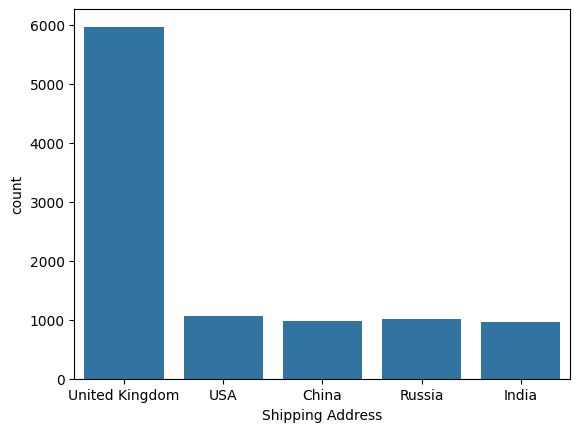

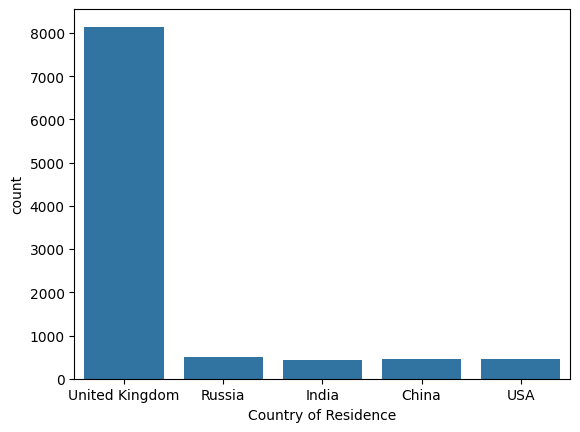

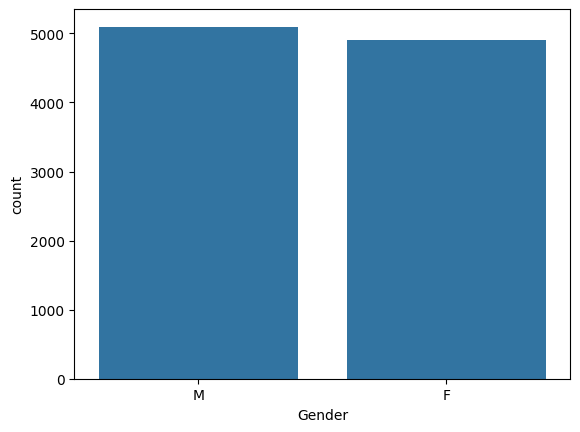

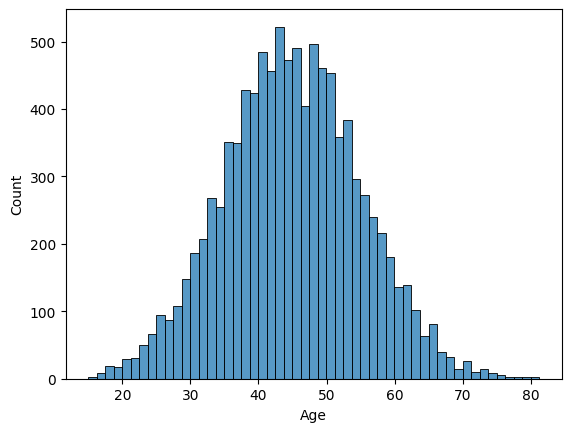

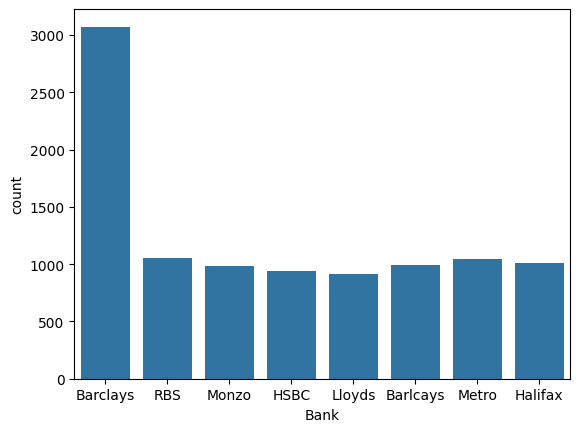

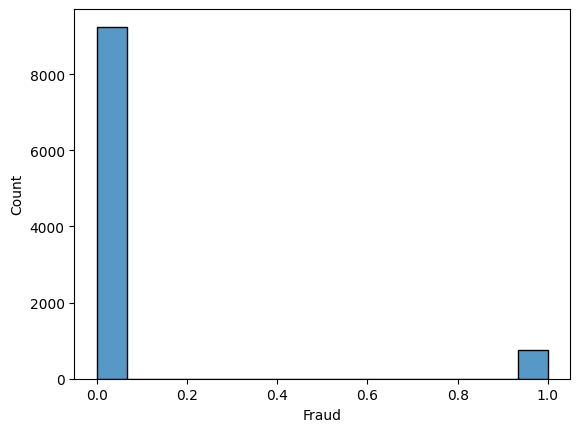

,type,missing,unique,min,q1,median,q3,max,mode,mean,std,skew,kurt
Date,categorical,0,3,-,-,-,-,-,14-Oct-20,-,-,-,-
Day of Week,categorical,0,3,-,-,-,-,-,Wednesday,-,-,-,-
Time,numeric,0,24,0,10.0,15.0,19.0,23,13,14.48,5.32,-0.19,-0.73
Type of Card,categorical,0,2,-,-,-,-,-,Visa,-,-,-,-
Entry Mode,categorical,0,3,-,-,-,-,-,PIN,-,-,-,-
Amount,numeric,2,396,5.0,17.0,29.0,202.0,400.0,17.0,110.09,122.69,0.97,-0.52
Type of Transaction,categorical,0,3,-,-,-,-,-,Online,-,-,-,-
Merchant Group,categorical,0,10,-,-,-,-,-,Children,-,-,-,-
Country of Transaction,categorical,0,5,-,-,-,-,-,United Kingdom,-,-,-,-
Shipping Address,categorical,0,5,-,-,-,-,-,United Kingdom,-,-,-,-


In [16]:
import sys
sys.path.append("/Users/alexandermaat/Documents/GitHub/School-S2")

import functions as fun

df = fun.basic_wrangling(df)
fun.univariate(df)

# bc so few entries on 15-oct, tree will over fit, so we must remove, same with thursday etc
# need fraud to be at least 5% of the data, see on last graph

In [17]:
# look for missing data 
df = fun.missing_drop(df, label='Fraud')


         Missing  column    rows
Amount        2  140000  149970
99.98% (149970 / 149998) of non-null cells were kept.


/Users/alexandermaat/Documents/GitHub/School-S2/functions.py:470: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max = df_results[['column', 'rows']].max(axis=1)[0]


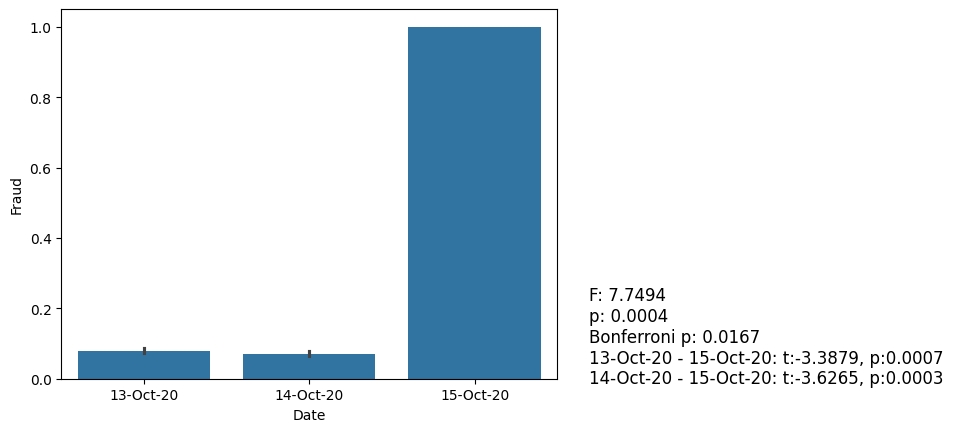

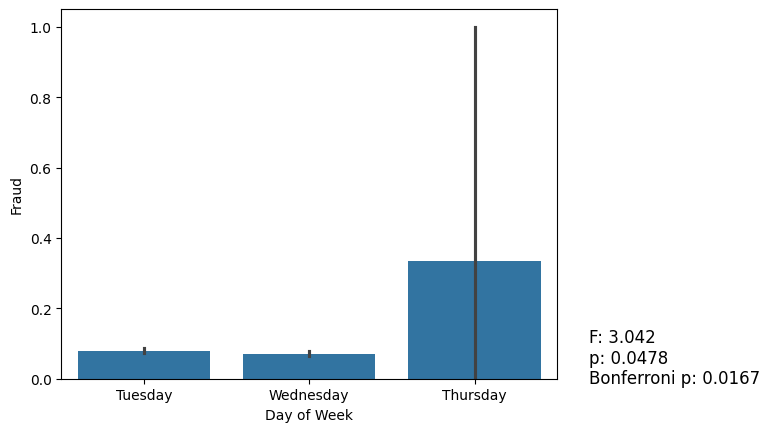

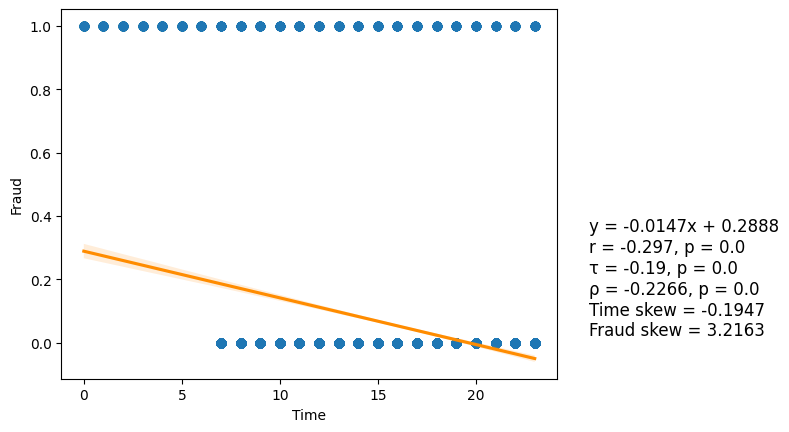

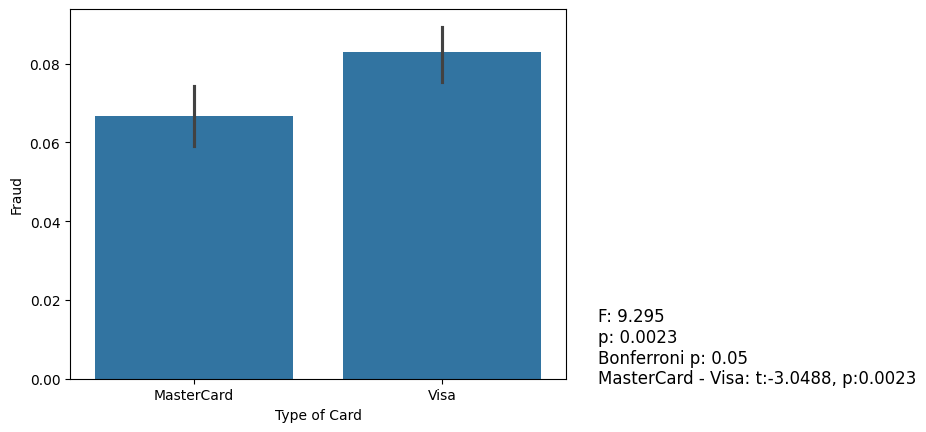

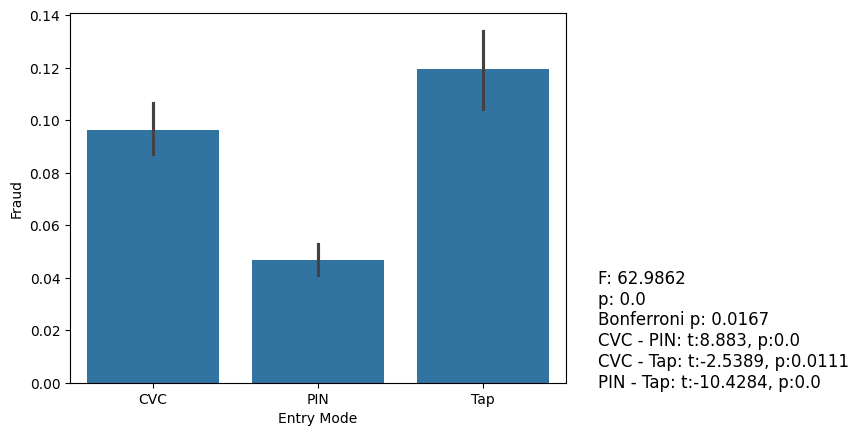

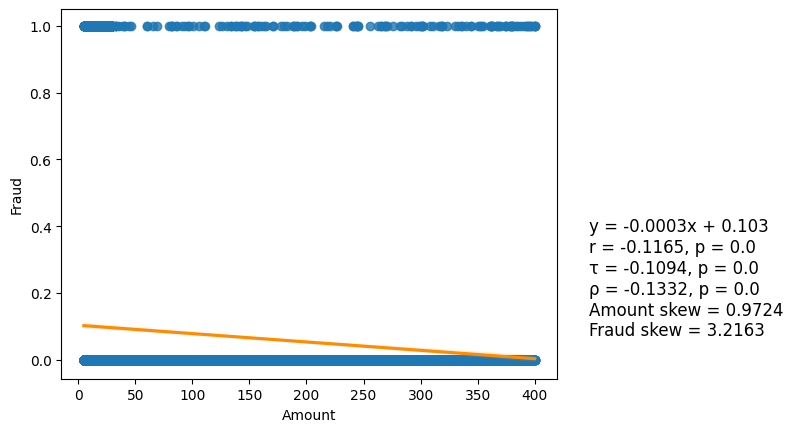

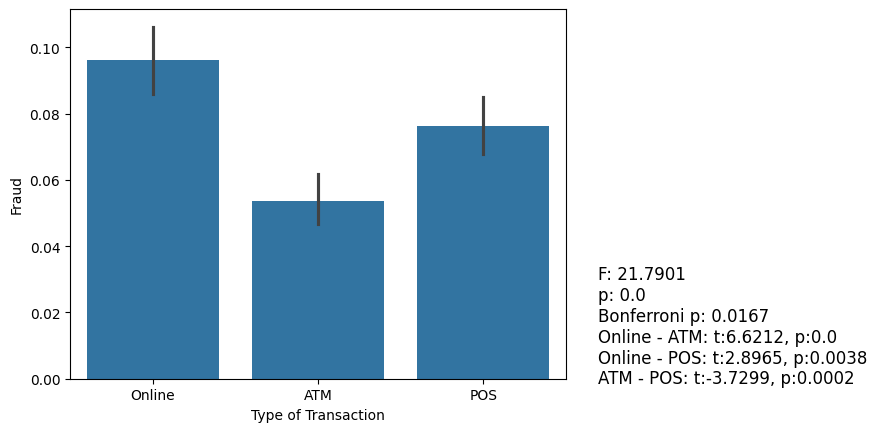

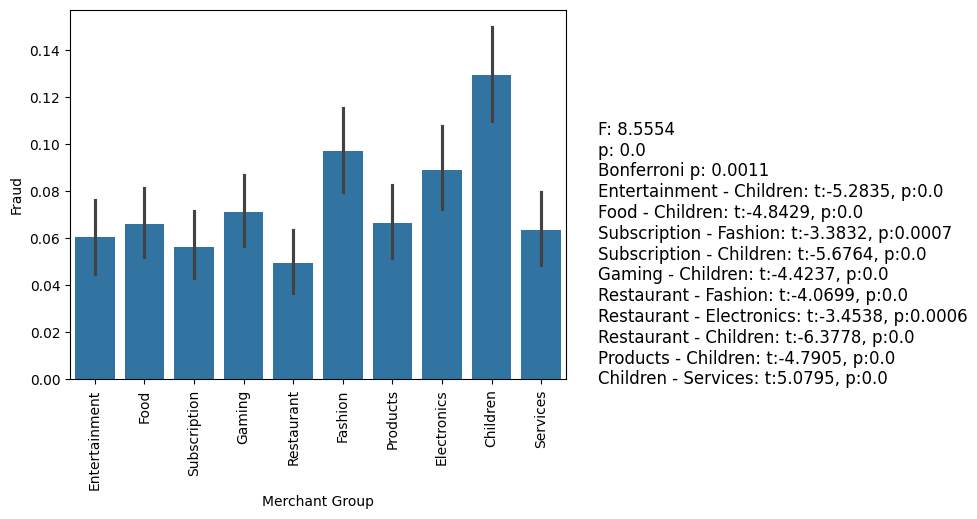

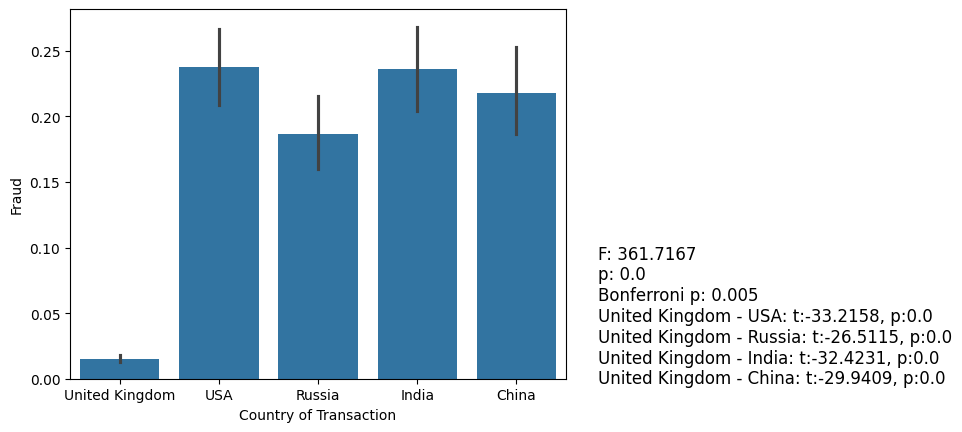

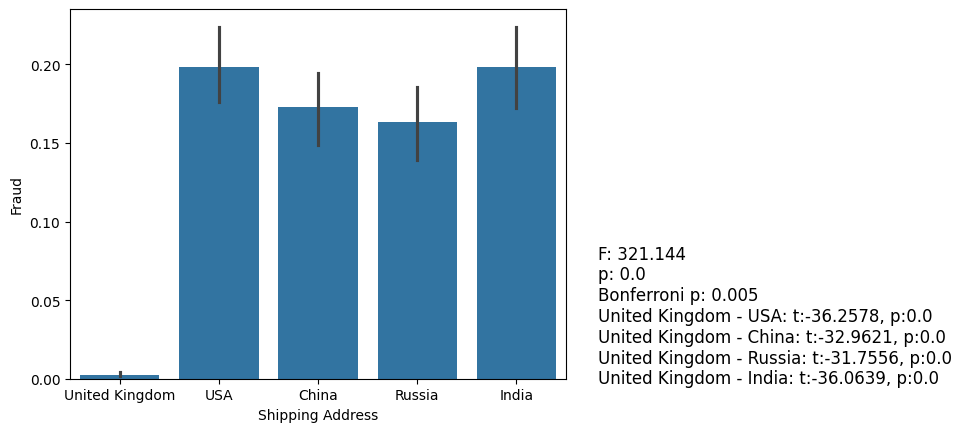

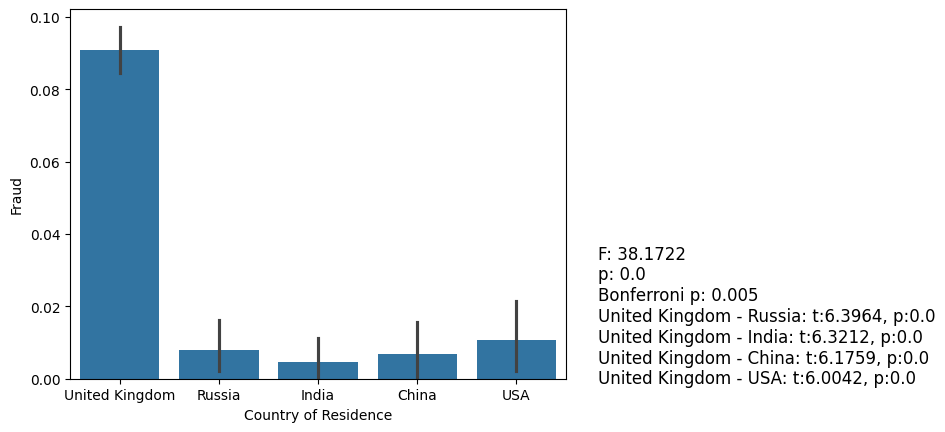

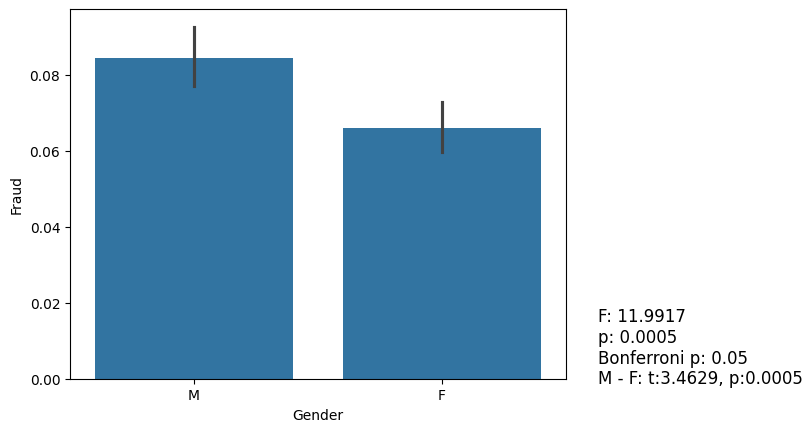

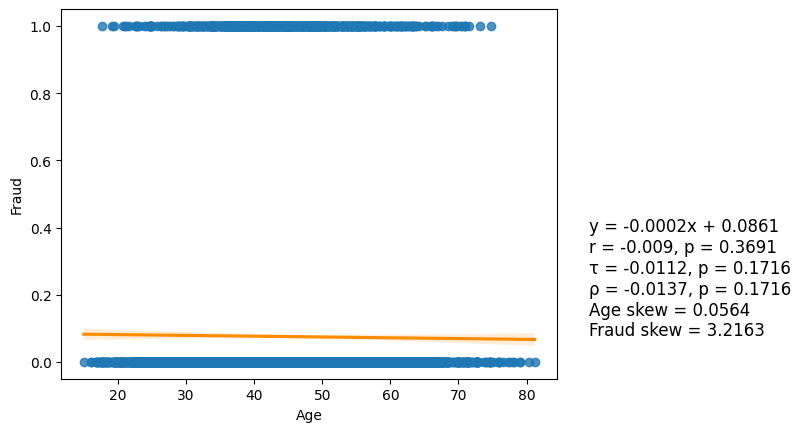

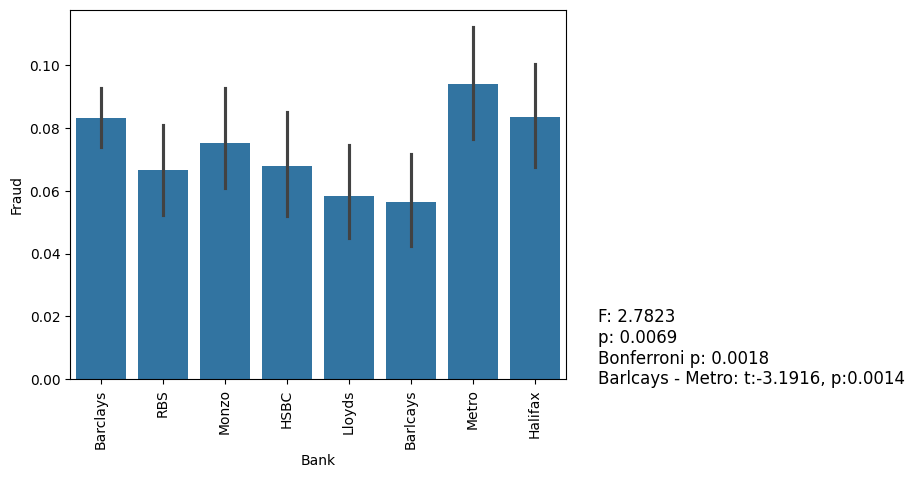

,missing %,skew,type,unique,p,r,τ,ρ,y = m(x) + b,F,X2
Time,0.0%,-0.1947,int64,24,0.0000,-0.297,-0.19,-0.2266,y = -0.0147x + 0.2888,-,-
Entry Mode,0.0%,-,object,3,0.0000,-,-,-,-,62.9862,-
Amount,0.0%,0.9724,float64,396,0.0000,-0.1165,-0.1094,-0.1332,y = -0.0003x + 0.103,-,-
Type of Transaction,0.0%,-,object,3,0.0000,-,-,-,-,21.7901,-
Merchant Group,0.0%,-,object,10,0.0000,-,-,-,-,8.5554,-
Country of Transaction,0.0%,-,object,5,0.0000,-,-,-,-,361.7167,-
Shipping Address,0.0%,-,object,5,0.0000,-,-,-,-,321.144,-
Country of Residence,0.0%,-,object,5,0.0000,-,-,-,-,38.1722,-
Date,0.0%,-,object,3,0.0004,-,-,-,-,7.7494,-
Gender,0.0%,-,object,2,0.0005,-,-,-,-,11.9917,-


In [18]:
# bivariate analysis

fun.bivariate(df, 'Fraud')

In [19]:
# df = fun.bin_categories(df)
# df.head()
# might need to bin data here

In [20]:
from sklearn.tree import DecisionTreeClassifier

y = df.Fraud
X = df.drop(columns=['Fraud'])
X = pd.get_dummies(X, drop_first=True)
# no need to assign const = 1 bc no need to fit an intercept
X.head()


,Time,Amount,Age,Date_14-Oct-20,Date_15-Oct-20,Day of Week_Tuesday,Day of Week_Wednesday,Type of Card_Visa,Entry Mode_PIN,Entry Mode_Tap,...,Country of Residence_USA,Country of Residence_United Kingdom,Gender_M,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS
43660,12,365.0,39.0,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
87278,11,371.0,51.8,True,False,False,True,True,True,False,...,False,True,False,False,False,False,False,False,False,True
14317,20,123.0,27.9,True,False,False,True,True,False,False,...,False,True,True,False,False,False,False,False,False,False
81932,13,15.0,61.9,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
95321,13,5.0,41.1,True,False,False,True,False,True,False,...,False,True,True,False,False,False,False,False,True,False


In [21]:
model = DecisionTreeClassifier(max_depth=5).fit(X, y)
# training the model 

In [22]:
# evaluate the model to see how it did 
y_pred = model.predict(X)


In [23]:
df_output = pd.DataFrame({'actual': y, 'predicted': y_pred})
df_output.head(5)

,actual,predicted
43660,0,0
87278,0,0
14317,0,0
81932,0,0
95321,0,0


In [24]:
# how to evaluate the model
# was it right or wrong? 
# accuracy = (true positive + true negative) / total
# confusion matrix = true positive, true negative, false positive, false negative

# making confusion matrix
from sklearn import metrics
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y, y_pred)
cm

array([[9144,  100],
       [ 119,  635]])

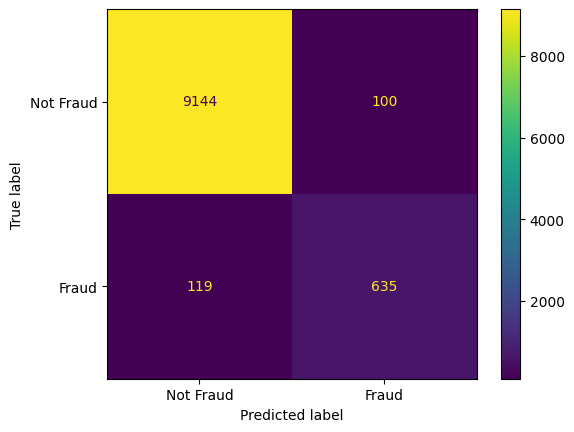

Accuracy: 	 0.9780956191238248


In [25]:
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['Not Fraud', 'Fraud'])
cm_display.plot(values_format='d')
plt.show()
print(f'Accuracy: \t {model.score(X, y)}')
# 9244 predicted to be not fraud, 0 missed 
# 756 predicted to be fraud, 0 missed

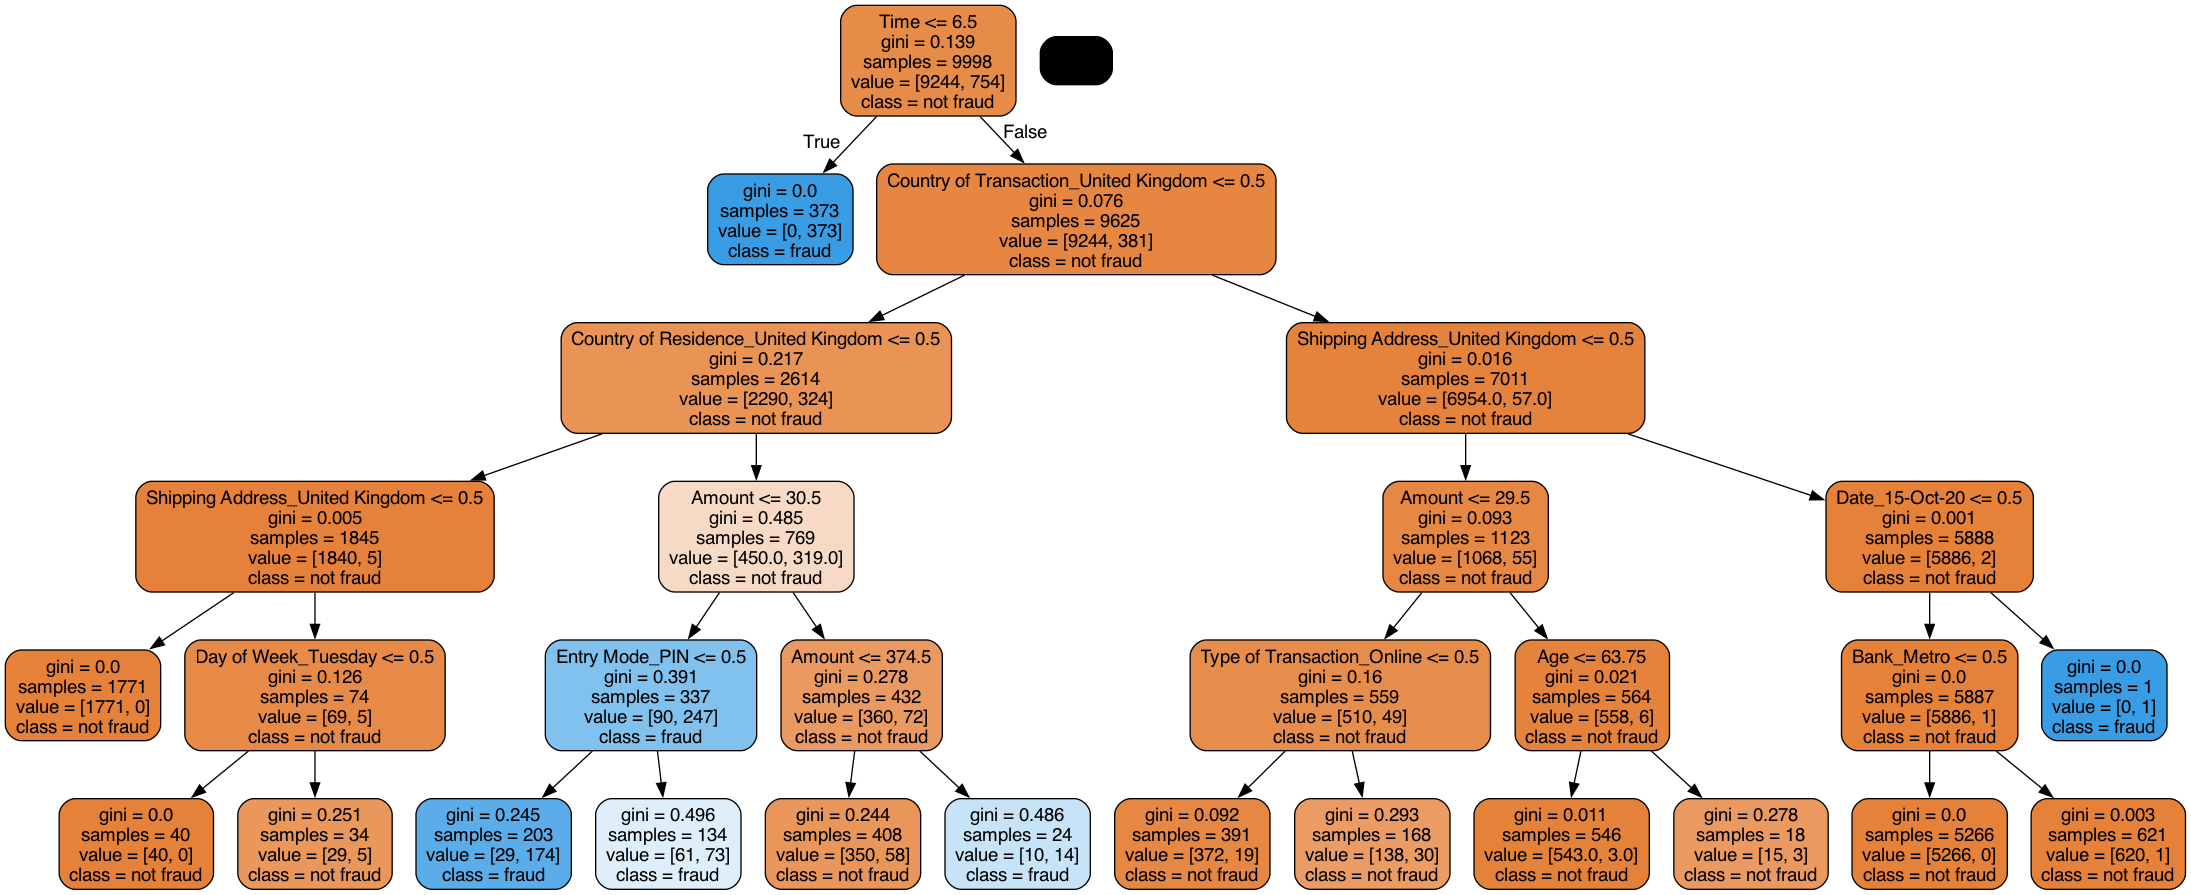

In [26]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, # This is the model we trained previously
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                feature_names = X.columns,
                class_names=['not fraud','fraud'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('fraud.png') # Save the image file
Image(graph.create_png())     # This is like plt.show()


In [27]:
# need to split the data bc the data is too fit to the model
# recall 

